In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import statsmodels.api as sm
from scipy import stats

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [4]:
# Set visual display settings
sns.set(style='whitegrid')

<h2>Load dataset from csv</h2>

In [5]:
# load csv
df = pd.read_csv('complete_renewable_energy_dataset 2.csv')

In [6]:
# Get the first few rows of the data
df.head()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0


<h2>DataFrame Information</h2>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 56 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  2500 non-null   object 
 1   Year                                     2500 non-null   int64  
 2   Energy Type                              2500 non-null   object 
 3   Production (GWh)                         2500 non-null   float64
 4   Installed Capacity (MW)                  2500 non-null   float64
 5   Investments (USD)                        2500 non-null   float64
 6   Population                               2500 non-null   int64  
 7   GDP                                      2500 non-null   float64
 8   Energy Consumption                       2500 non-null   float64
 9   Energy Exports                           2500 non-null   float64
 10  Energy Imports                           2500 no

<h2>Data Cleaning: Drop duplicate rows</h2>

In [8]:
# data.drop_duplicates(inplace=True)
# print(data.isnull().sum())
# data.fillna(method='ffill', inplace=True)  # Forward fill for missing values

df = df.drop_duplicates()

<h2>List of countries and energy types included in the dataset</h2>

In [9]:
energyTypes = df['Energy Type'].unique().tolist()
energyTypes

['Solar', 'Geothermal', 'Biomass', 'Wind', 'Hydro']

In [10]:
countriesIncluded = df['Country'].unique().tolist()
countriesIncluded

['USA',
 'Australia',
 'Canada',
 'Japan',
 'China',
 'India',
 'Germany',
 'France',
 'Brazil',
 'Russia']

<h2>Descriptive Statistics</h2>

In [11]:
# Dataframe
df.describe()

,Year,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,Energy Imports,CO2 Emissions,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
count,2500.000000,2500.000000,2500.000000,2.500000e+03,2.500000e+03,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000
mean,2011.437600,48743.195073,24882.910674,4.956155e+09,7.458927e+08,1.010745e+14,495701.245158,50143.392627,50800.373871,491218.412643,...,50.736720,48.442085,50.280019,496.660400,50.431200,4978.93360,502040.891200,49.749110,0.512000,0.473600
std,6.895471,28340.915147,14463.459958,2.894789e+09,4.373146e+08,5.782363e+13,291419.017957,28833.333066,28740.851763,289783.733338,...,28.623766,28.798216,28.719483,296.181011,28.877168,2881.93256,293084.636148,28.924307,0.499956,0.499402
min,2000.000000,1053.354158,114.531639,5.886994e+06,1.255357e+06,5.603965e+10,1264.851083,1036.618008,1057.783513,1124.768458,...,0.104915,0.025281,0.025733,0.000000,0.000000,3.00000,494.000000,0.033829,0.000000,0.000000
25%,2006.000000,24309.656479,12282.213159,2.473145e+09,3.720811e+08,5.049265e+13,237300.546551,25146.745295,26347.461047,242894.720511,...,26.241437,23.519814,25.934406,234.000000,26.000000,2532.00000,244438.000000,23.968451,0.000000,0.000000
50%,2011.000000,47367.117600,24689.162460,4.961772e+09,7.515190e+08,1.027006e+14,496118.165272,49706.656938,50698.800022,475721.007886,...,50.850766,48.127673,51.398964,493.000000,51.000000,4992.50000,499151.000000,50.232069,1.000000,0.000000
75%,2017.250000,73079.452832,37438.443570,7.418384e+09,1.118019e+09,1.519604e+14,753779.282813,75567.191515,75807.642495,747649.446362,...,74.908485,73.324825,74.724073,755.000000,76.000000,7465.00000,765088.000000,74.354781,1.000000,1.000000
max,2023.000000,99937.503719,49997.387577,9.998292e+09,1.499494e+09,1.999223e+14,999618.512172,99952.509817,99912.213813,999816.500175,...,99.970526,99.901347,99.998838,999.000000,99.000000,9999.00000,999226.000000,99.988355,1.000000,1.000000


<h4>Sort the means in descending order and get the 22 highest factors based on mean</h4>

In [12]:
numeric_cols = df.select_dtypes(include='number')

In [13]:
numeric_cols_without_year = numeric_cols.drop(['Year'], axis=1)

In [14]:
# Calculate the mean of all numeric columns
mean_values = numeric_cols_without_year.mean()

# Sort the means in descending order
sorted_means = mean_values.sort_values(ascending=False).head(22)

# Display the sorted means
print("Mean of numeric columns ranked in descending order:")
print(sorted_means)

Mean of numeric columns ranked in descending order:
GDP                                        1.010745e+14
R&D Expenditure                            5.004689e+09
Investments (USD)                          4.956155e+09
Population                                 7.458927e+08
International Aid for Renewables           5.089057e+08
Energy Subsidies                           5.003271e+08
Renewable Energy Jobs                      5.028961e+05
Energy Sector Workforce                    5.020409e+05
Energy Consumption                         4.957012e+05
CO2 Emissions                              4.912184e+05
Energy Imports                             5.080037e+04
Energy Exports                             5.014339e+04
Production (GWh)                           4.874320e+04
Installed Capacity (MW)                    2.488291e+04
Number of Renewable Energy Publications    4.978934e+03
Annual Rainfall                            1.581673e+03
Energy Storage Capacity                    5.150320e

<h4>Distribution of Renewable Energy Jobs</h4>

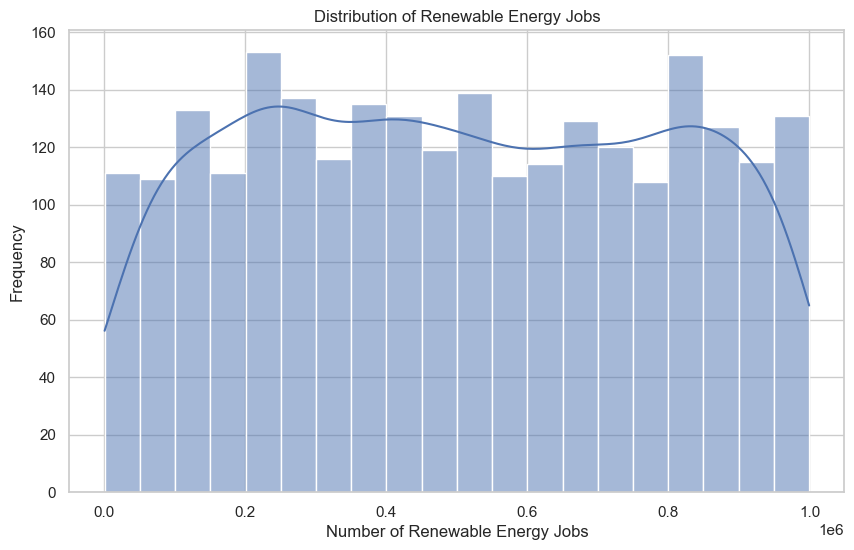

In [15]:
# Distribution of Renewable Energy Jobs
plt.figure(figsize=(10, 6))
sns.histplot(df['Renewable Energy Jobs'], bins=20, kde=True)
plt.title('Distribution of Renewable Energy Jobs')
plt.xlabel('Number of Renewable Energy Jobs')
plt.ylabel('Frequency')
plt.show()

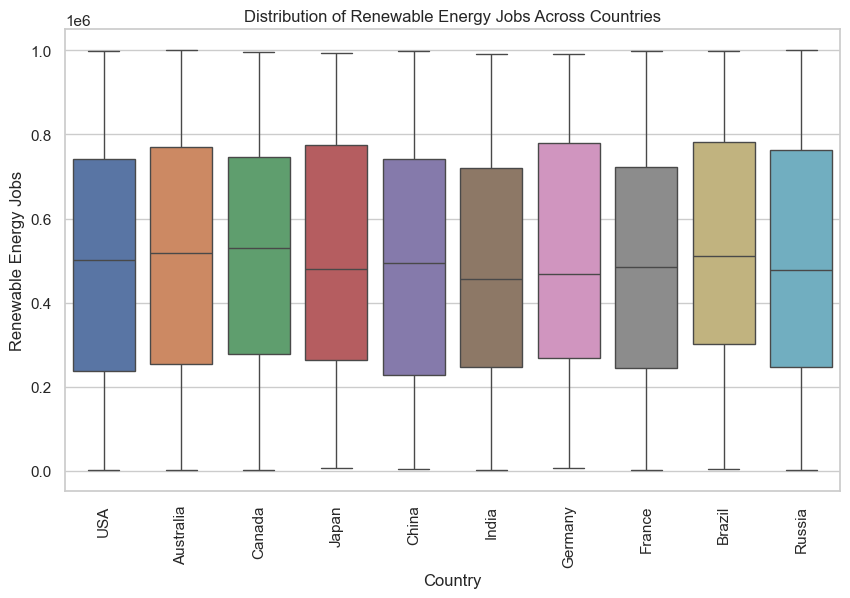

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Country', y='Renewable Energy Jobs', data=df, hue='Country')
plt.xticks(rotation=90)
plt.title('Distribution of Renewable Energy Jobs Across Countries')
plt.show()

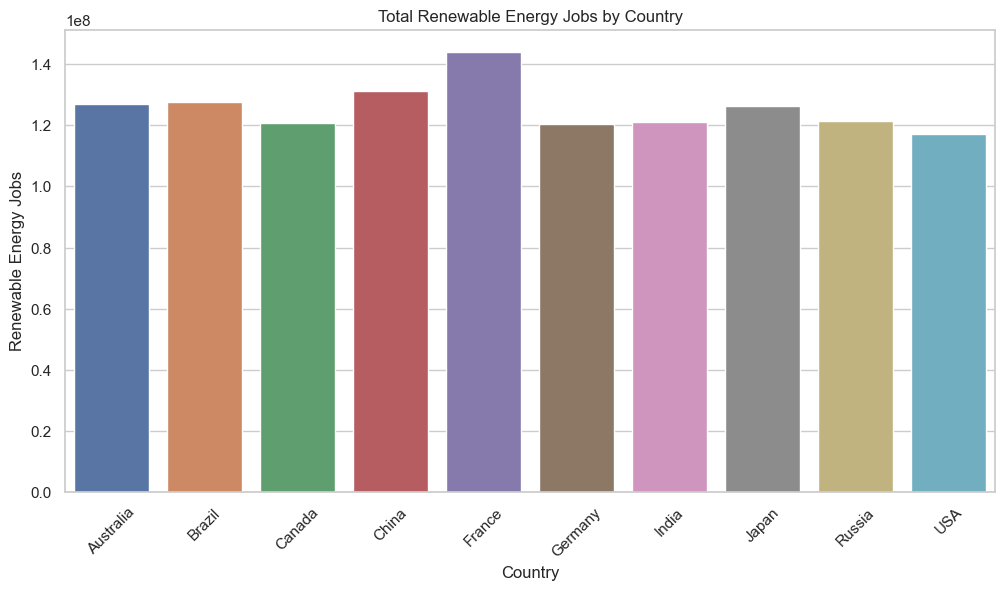

In [17]:
# Grouping by country
region_jobs = df.groupby('Country')['Renewable Energy Jobs'].sum().reset_index()

# Bar plot for Renewable Energy Jobs by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Renewable Energy Jobs', data=region_jobs, hue='Country')
plt.title('Total Renewable Energy Jobs by Country')
plt.xticks(rotation=45)
plt.show()

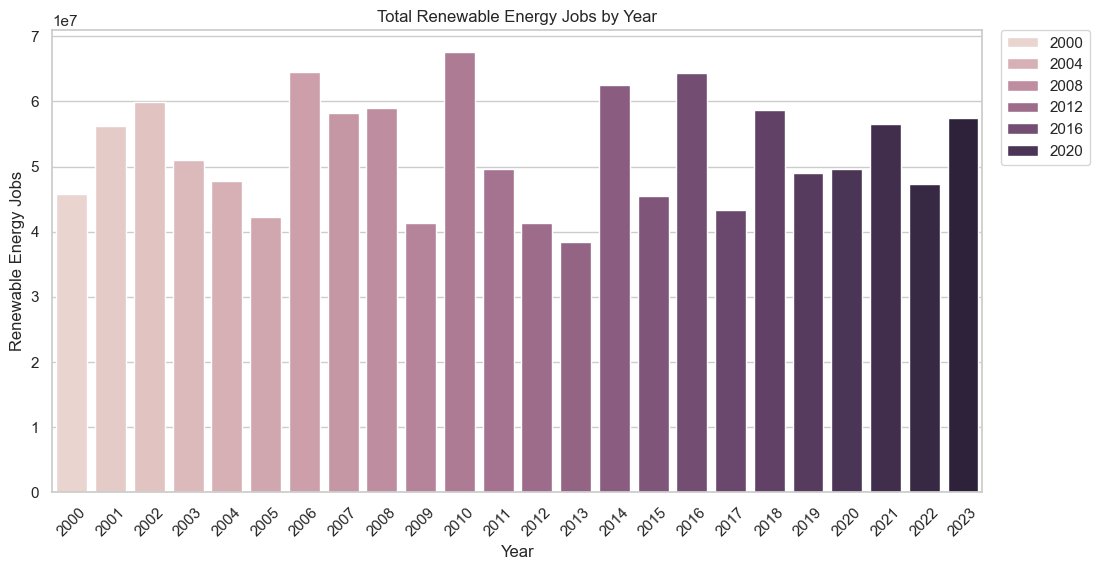

In [18]:
# Grouping by Year (assuming there is a 'Region' column)
region_year = df.groupby('Year')['Renewable Energy Jobs'].sum().reset_index()

# Bar plot for Renewable Energy Jobs by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Renewable Energy Jobs', data=region_year, hue='Year')
plt.title('Total Renewable Energy Jobs by Year')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=45)
plt.show()

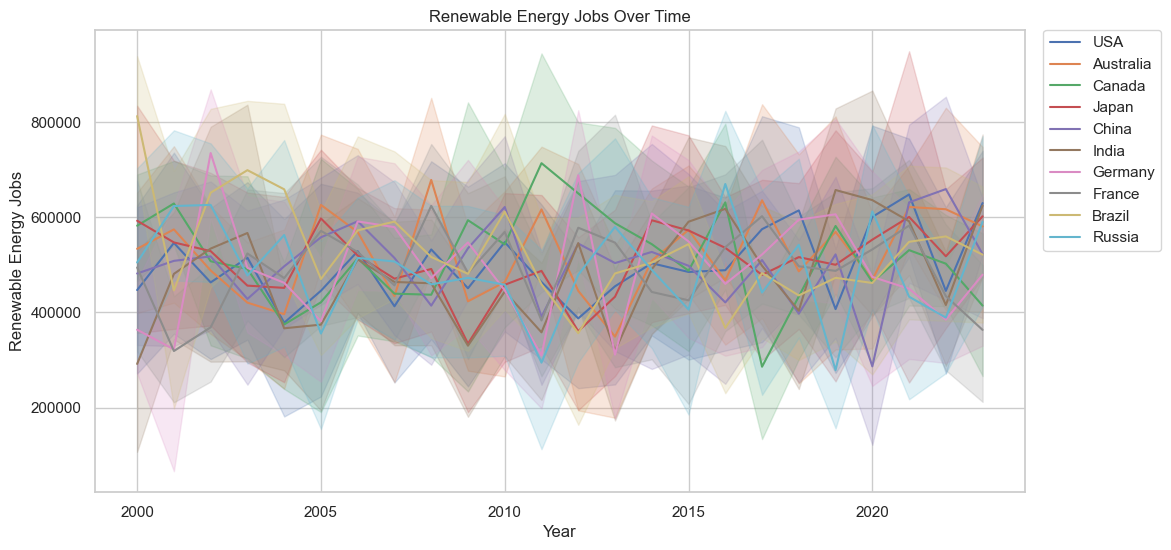

In [19]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Renewable Energy Jobs', data=df, hue='Country')
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Renewable Energy Jobs Over Time')
plt.show()

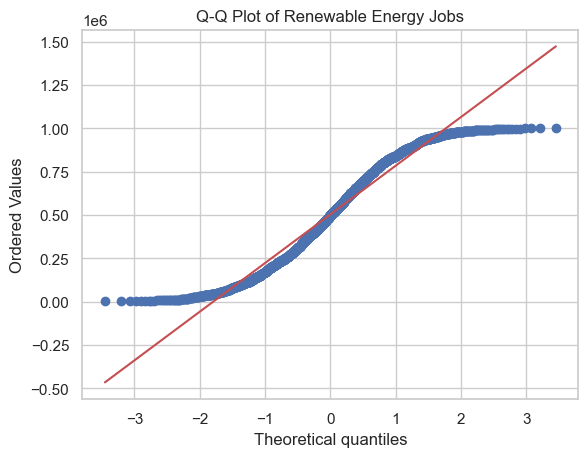

In [20]:
# Q-Q Plot
# This will help identify if the data follows a normal distribution.
stats.probplot(df['Renewable Energy Jobs'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Renewable Energy Jobs')
plt.show()

<h4>Correlation matrix of selected socioeconomic factors</h4>

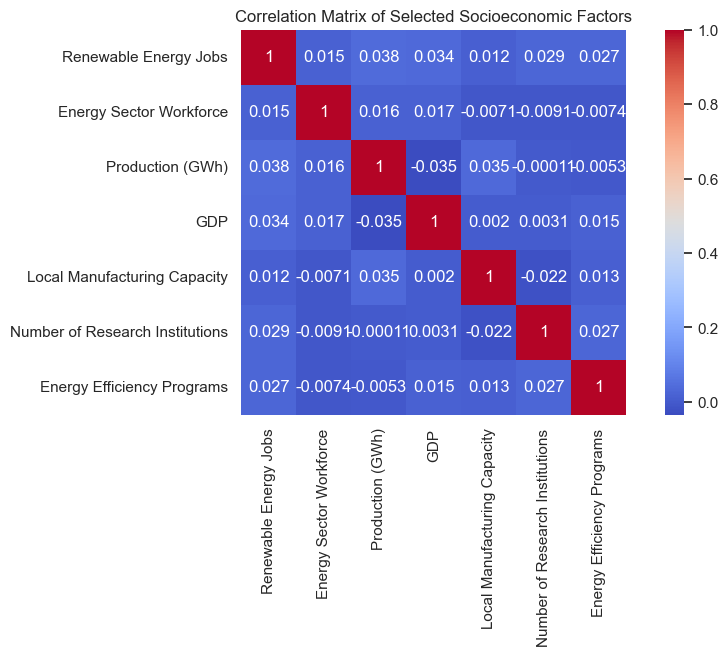

In [21]:
corr_matrix = df[['Renewable Energy Jobs','Energy Sector Workforce','Production (GWh)','GDP', 
                           'Local Manufacturing Capacity', 'Number of Research Institutions', 'Energy Efficiency Programs']].corr()
# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Selected Socioeconomic Factors')
plt.show()

In [22]:
# Regression analysis to quantify the impact of renewable energy consumption on GDP and substantiate the findings.
X1 = df['Renewable Energy Jobs']
Y1 = df['Production (GWh)']

X1 = sm.add_constant(X1)  # Adding a constant to the model
model1 = sm.OLS(Y1, X1).fit()  # Fitting the regression model
print(model1.summary())  # Displaying the model summary

                            OLS Regression Results                            
Dep. Variable:       Production (GWh)   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.669
Date:                Sat, 21 Sep 2024   Prob (F-statistic):             0.0556
Time:                        22:59:43   Log-Likelihood:                -29175.
No. Observations:                2500   AIC:                         5.835e+04
Df Residuals:                    2498   BIC:                         5.837e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.684e+

In [38]:
df1 = df[df['Country'] == 'Brazil']

In [39]:
# Regression analysis to quantify the impact of renewable energy consumption on GDP and substantiate the findings.
X = df1['Renewable Energy Jobs']
Y = df1['Production (GWh)']

X = sm.add_constant(X)  # Adding a constant to the model
model1 = sm.OLS(Y, X).fit()  # Fitting the regression model
print(model1.summary())  # Displaying the model summary

                            OLS Regression Results                            
Dep. Variable:       Production (GWh)   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.348
Date:                Sat, 21 Sep 2024   Prob (F-statistic):              0.247
Time:                        23:07:26   Log-Likelihood:                -2848.4
No. Observations:                 244   AIC:                             5701.
Df Residuals:                     242   BIC:                             5708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.502e+